In [3]:
import os
import sys

import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits import mplot3d
from Turbinen_class_file import Turbine

#importing pressure conversion function
current = os.path.dirname(os.path.realpath('messy.ipynb'))
parent = os.path.dirname(current)
sys.path.append(parent)
from functions.pressure_conversion import pressure_conversion

In [4]:
Q_nenn = 0.85
p_nenn = pressure_conversion(10.6,'bar','Pa')
Test_1 = Turbine(Q_nenn,p_nenn,1,1,'bar')
Test_1.get_info(full=True)

Turbine has the following attributes: 
----------------------------- 
Type                  =       Generisch 
Nominal flux          =       0.85       m³/s 
Nominal pressure      =       10.6       bar
Nominal LA            =       100.0      % 
Closing time          =       1          s 
Current flux          =       -inf       m³/s 
Current pipe pressure =       -inf       bar 
Current LA            =       -inf       % 
Simulation timestep   =       1          s 
----------------------------- 



In [5]:
n_p = 201
n_LA = 201

ps = np.linspace(0,2*Test_1.p_n,n_p,endpoint=True)
LAs = np.linspace(0,1,n_LA,endpoint=True)

Text(0.5, 0, 'Q [m³/s]')

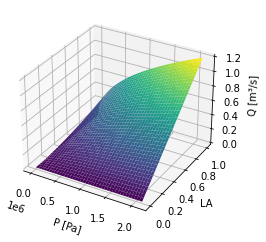

In [6]:
Q_mat = np.empty([n_LA,n_p])

pp,ll = np.meshgrid(ps,LAs)

for i in range(n_p):
    for j in range(n_LA):
        Test_1.set_pressure(pp[i,j])
        Test_1.set_LA(ll[i,j],display_warning=False)
        Q_mat[i,j] = Test_1.get_current_Q()

fig1 = plt.figure()
ax1 = plt.axes(projection='3d')

ax1.plot_surface(pp, ll, Q_mat,cmap='viridis', edgecolor='none')
ax1.set_xlabel('P [Pa]')
ax1.set_ylabel('LA')
ax1.set_zlabel('Q [m³/s]')


(0.0, 1.275)

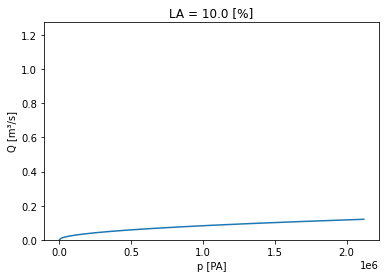

In [7]:
LA_test = 0.1
LA_index = int(np.argmin(abs(LAs-LA_test)))
LA_test2 = LAs[LA_index]

fig = plt.figure()
plt.plot(ps,Q_mat[LA_index,:])
plt.xlabel('p [PA]')
plt.ylabel('Q [m³/s]')
plt.title('LA = '+ str(100*LA_test2) + ' [%]')
plt.ylim([0,1.5*Q_nenn])

(0.0, 1.275)

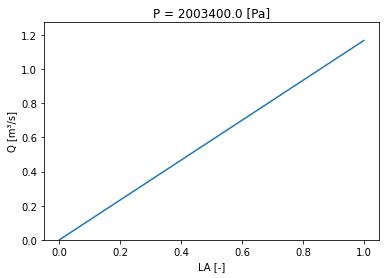

In [8]:
p_test = pressure_conversion(20.,'bar','Pa')
p_index = int(np.argmin(abs(ps-p_test)))
p_test2 = ps[p_index]

fig = plt.figure()
plt.plot(LAs,Q_mat[:,p_index])
plt.xlabel('LA [-]')
plt.ylabel('Q [m³/s]')
plt.title('P = '+ str(p_test2) + ' [Pa]')
plt.ylim([0,1.5*Q_nenn])